In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\ChickPea\ChickPea_MP_updated.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [5]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [6]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [7]:
df.shape

(1250, 97)

In [8]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [9]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [10]:
df.shape

(1015, 97)

In [11]:
df['Yield(Tonnes/Hectare)'].skew()

1.0218648330751237

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_28100\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

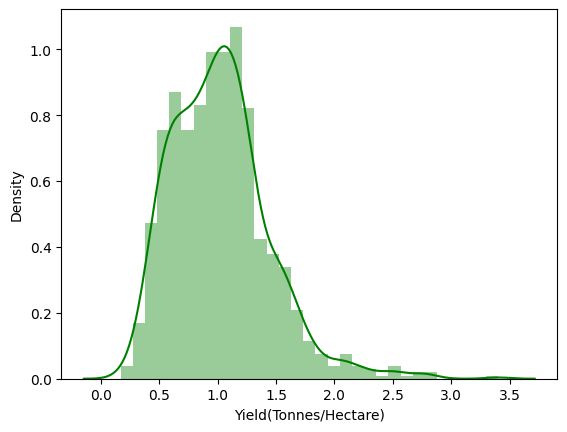

In [12]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [13]:
df['Yield(Tonnes/Hectare)']

6       1.14
7       1.00
8       1.02
9       1.00
10      0.76
        ... 
1243    0.86
1244    1.56
1245    1.56
1246    1.59
1247    1.24
Name: Yield(Tonnes/Hectare), Length: 1015, dtype: float64

In [14]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 989


In [15]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [16]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [17]:
df['Yield(Tonnes/Hectare)'].skew()

0.2852316162278288

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_28100\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

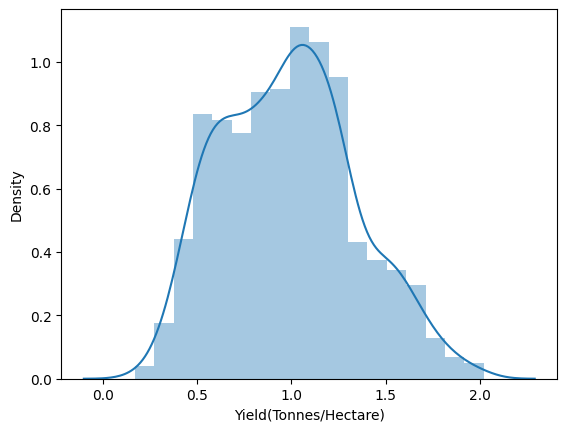

In [18]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [19]:
df.head(10)

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
6,26.067902,22.926133,22.322573,25.399277,31.695860,35.902315,26.239048,23.603049,22.549155,25.033027,...,0,0,0,50.386171,48.913918,50.453466,35.246657,20.819689,24.287291,1.14
7,25.871806,23.084699,23.027444,26.084324,30.660893,34.803107,26.151689,23.526099,23.429477,25.635279,...,1,2,0,47.861046,43.239681,47.364364,35.010391,26.392700,17.331910,1.00
8,24.016368,22.381669,23.377221,27.492971,27.671280,34.457169,24.428738,22.965790,23.488667,26.856390,...,0,3,1,41.614175,44.771326,40.359641,30.004931,41.513569,24.230550,1.02
9,25.500651,23.782685,23.525030,26.419278,30.420838,35.321209,25.768721,24.230379,23.678202,26.199659,...,0,0,0,58.643027,54.850803,48.212678,41.711799,28.996326,23.143729,1.00
10,24.814927,23.620362,23.411051,24.158815,30.845634,34.883407,25.285390,23.891198,23.793144,24.006996,...,0,0,0,49.797599,52.456387,46.137357,33.326873,28.703663,21.854922,0.76
11,25.129316,24.066362,24.774233,27.564231,31.468461,35.047425,25.381448,24.438822,24.683100,27.174582,...,0,0,0,49.951694,44.511355,47.994250,34.110869,24.524251,18.957647,0.83
13,26.348058,22.136230,21.733105,25.953501,30.329466,34.411148,26.572674,22.914084,22.012604,25.684578,...,0,0,0,68.494533,53.851105,43.889803,41.714757,27.653531,26.195974,0.90
14,26.277706,23.540111,22.615088,25.790195,29.432515,35.365522,26.495670,24.070370,22.975359,25.516489,...,0,0,0,46.638447,47.025874,49.436328,35.326016,21.981613,22.616386,1.12
15,24.715917,23.873106,23.142761,26.328623,30.734187,34.762734,25.060666,24.220243,23.381692,26.030189,...,3,0,0,48.794034,50.651119,47.032704,47.466669,28.166802,25.772165,1.11
16,23.803000,22.230446,23.217017,24.155424,27.953242,34.929313,24.180783,22.662530,23.393892,24.046270,...,3,1,0,55.869630,54.938885,58.815938,49.106260,43.130925,24.304271,0.93


In [20]:
df.shape

(989, 97)

In [21]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [22]:
df.head()

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
6,26.067902,22.926133,22.322573,25.399277,31.695860,35.902315,26.239048,23.603049,22.549155,25.033027,...,0,0,0,50.386171,48.913918,50.453466,35.246657,20.819689,24.287291,1.14
7,25.871806,23.084699,23.027444,26.084324,30.660893,34.803107,26.151689,23.526099,23.429477,25.635279,...,1,2,0,47.861046,43.239681,47.364364,35.010391,26.392700,17.331910,1.00
8,24.016368,22.381669,23.377221,27.492971,27.671280,34.457169,24.428738,22.965790,23.488667,26.856390,...,0,3,1,41.614175,44.771326,40.359641,30.004931,41.513569,24.230550,1.02
9,25.500651,23.782685,23.525030,26.419278,30.420838,35.321209,25.768721,24.230379,23.678202,26.199659,...,0,0,0,58.643027,54.850803,48.212678,41.711799,28.996326,23.143729,1.00
10,24.814927,23.620362,23.411051,24.158815,30.845634,34.883407,25.285390,23.891198,23.793144,24.006996,...,0,0,0,49.797599,52.456387,46.137357,33.326873,28.703663,21.854922,0.76


In [23]:
df.shape

(989, 97)

In [24]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [25]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [26]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [27]:
df.shape

(989, 97)

In [28]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.56, R^2 Score (Test): 0.43
[0.5267002390306259, 0.48052433867157285, 0.31980648875690376, 0.4303226240652096, 0.2713214122575962, 0.47928923283801894, 0.4956902518003099, 0.327031469910127, 0.5418175681027417, 0.43144701597983914]
Ridge Regression - R^2 Score (Train) : 0.51, R^2 Score (Test): 0.41
[0.3510272803923442, 0.5103031058121477, 0.4456403928929453, 0.41323414566671346, 0.41405928850955187, 0.537329442058504, 0.20188021350381324, 0.44600205754483035, 0.3409820504533627, 0.44440672822461014]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.50
[0.5372561567613502, 0.48746242518324634, 0.5418832858177519, 0.429346001787161, 0.5129633559443547, 0.4490622190380912, 0.48431260092052764, 0.46831355504895666, 0.4861691274188633, 0.5701519646505058]
Lasso Regression - R^2 Score (Train) : 0.04, R^2 Score (Test): -0.00
[-0.027991268330911367, 0.020660415733968707, 0.0035298708561724013, -0.0013327405559426797, -0.008012953473680362, -

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [33]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [34]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

318


In [35]:
print(columns_to_drop)

['stl2_11', 'stl3_11', 'stl2_12', 'stl3_12', 'stl3_1', 'stl2_1', 'stl3_1', 'stl3_2', 'stl2_2', 'stl3_2', 'stl2_3', 'stl3_3', 'stl2_4', 'stl3_4', 'stl1_11', 'stl3_11', 'stl4_12', 'stl4_1', 'stl1_12', 'stl3_12', 'stl3_1', 'stl4_2', 'stl1_1', 'stl3_1', 'stl3_2', 'stl4_3', 'stl1_2', 'stl3_2', 'stl1_3', 'stl3_3', 'stl3_4', 'stl4_4', 'stl1_4', 'stl3_4', 'stl1_11', 'stl2_11', 'stl4_12', 'stl1_12', 'stl2_12', 'stl4_1', 'stl4_2', 'stl1_12', 'stl1_1', 'stl2_12', 'stl2_1', 'stl3_2', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_1', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_3', 'stl2_3', 'stl3_4', 'stl4_3', 'stl4_4', 'stl1_4', 'stl2_3', 'stl2_4', 'stl3_3', 'stl4_4', 'stl4_12', 'stl2_11', 'stl3_11', 'stl4_11', 'stl4_1', 'stl2_11', 'stl3_12', 'stl4_12', 'stl4_2', 'stl4_3', 'stl2_12', 'stl3_12', 'stl3_1', 'stl3_2', 'stl4_1', 'stl4_3', 'stl4_4', 'stl2_1', 'stl3_1', 'stl3_2', 'stl3_3', 'stl4_1', 'stl4_2', 'stl4_4', 'stl2_3', 'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_2', 'stl

In [36]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_11 : [('stl2_11', 0.9959), ('stl3_11', 0.9418)]
stl1_12 : [('stl2_12', 0.9956), ('stl3_12', 0.9202), ('stl3_1', 0.9255)]
stl1_1 : [('stl2_1', 0.9977), ('stl3_1', 0.9604), ('stl3_2', 0.912)]
stl1_2 : [('stl2_2', 0.9975), ('stl3_2', 0.9604)]
stl1_3 : [('stl2_3', 0.9956), ('stl3_3', 0.9426)]
stl1_4 : [('stl2_4', 0.995), ('stl3_4', 0.9356)]
stl2_11 : [('stl1_11', 0.9959), ('stl3_11', 0.9674), ('stl4_12', 0.913), ('stl4_1', 0.9003)]
stl2_12 : [('stl1_12', 0.9956), ('stl3_12', 0.9521), ('stl3_1', 0.9207), ('stl4_2', 0.9175)]
stl2_1 : [('stl1_1', 0.9977), ('stl3_1', 0.9758), ('stl3_2', 0.9118), ('stl4_3', 0.9031)]
stl2_2 : [('stl1_2', 0.9975), ('stl3_2', 0.9773)]
stl2_3 : [('stl1_3', 0.9956), ('stl3_3', 0.9691), ('stl3_4', 0.9076), ('stl4_4', 0.9178)]
stl2_4 : [('stl1_4', 0.995), ('stl3_4', 0.9654)]
stl3_11 : [('stl1_11', 0.9418), ('stl2_11', 0.9674), ('stl4_12', 0.9701)]
stl3_12 : [('stl1_12', 0.9202), ('stl2_12', 0.9521), ('stl4_1', 0.9567), ('stl4_2', 0.937

In [37]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")